# Μέρος Α
Υλοποίηση ταξινομητή μέγιστης πιθανοφάνειας

## 1. Υπολογισμός των παραμέτρων θ₁ and θ₂
Υπολογίζουμε τους ταξινομητές μέγιστης πιθανοφάνειας (MLE) για τις δύο κλάσεις ω₁ and ω₂, δεδομένου ότι οι αντίστοιχοι δείκτες είναι:

- Για την κλάση ω₁: `D₁ = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]`
- Για την κλάση ω₂: `D₂ = [-4.5, -3.4, -3.1, -3.0, -2.3]`

και η κατανομή πυκνότητας πιθανότητας:
$$
p(x|\theta) = \frac{1}{\pi (1 + \left(x - \theta)^2\right)}
$$

Απεικόνιση των $\log(D_1|\theta)$, $\log(D_2|\theta)$.

## 2. Ταξινόμηση των δύο συνόλων τιμών

Χρησιμοποιούμε την κατανομή πυκνότητας πιθανότητας και την παρακάτων συνάρτηση διάκρισης:

$$
g(x) = \log P(x|\hat{\theta}_1) - \log P(x|\hat{\theta}_2) + \log P(\omega_1) - \log P(\omega_2)
$$
Απεικόνιση της συνάρτησης διάκρισης $g(x)$ και για τις δύο κλάσεις ως συναρτήσεις των $\theta$.

Maximum Likelihood Estimate (MLE) for θ₁ (class ω₁): 2.5975975975975976
Maximum Likelihood Estimate (MLE) for θ₂ (class ω₂): -3.158158158158158


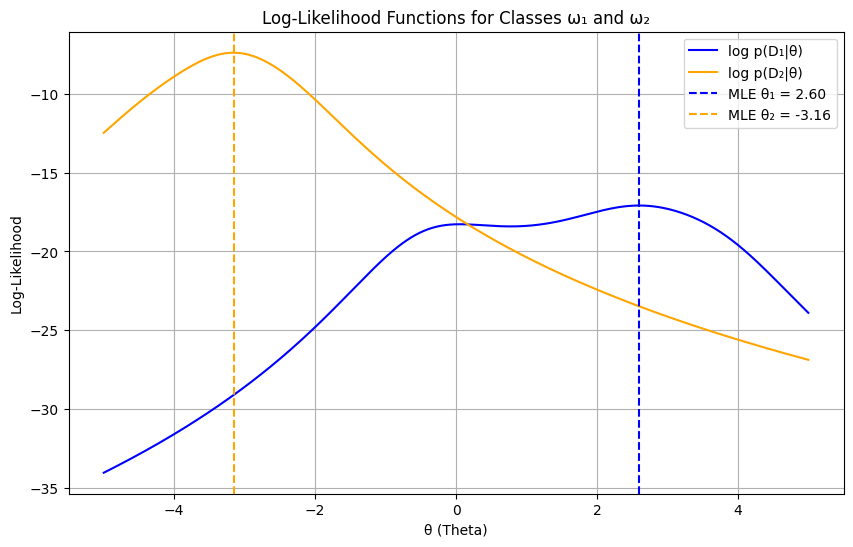

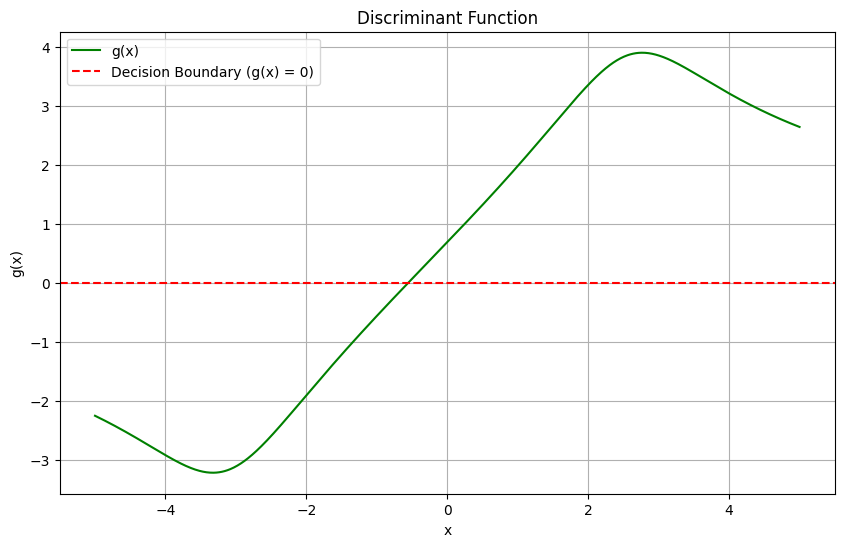

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# A.1

class Classifier:
    def __init__(self):
        self.theta1 = None
        self.theta2 = None

    def fit(self, D1, D2, theta_candidates):
        """
        Estimate the parameters theta1 and theta2 using Maximum Likelihood Estimation.
        """
        log_likelihood_D1 = [np.sum(np.log(1 / (np.pi * (1 + (D1 - theta)**2)))) for theta in theta_candidates]
        log_likelihood_D2 = [np.sum(np.log(1 / (np.pi * (1 + (D2 - theta)**2)))) for theta in theta_candidates]

        # Find theta values that maximize the log-likelihood
        self.theta1 = theta_candidates[np.argmax(log_likelihood_D1)]
        self.theta2 = theta_candidates[np.argmax(log_likelihood_D2)]

        return log_likelihood_D1, log_likelihood_D2

    def discriminant_function(self, x, prior_w1, prior_w2):
        """
        Compute the discriminant function g(x).
        """
        p_x_given_w1 = 1 / (np.pi * (1 + (x - self.theta1)**2))
        p_x_given_w2 = 1 / (np.pi * (1 + (x - self.theta2)**2))

        return np.log(p_x_given_w1) - np.log(p_x_given_w2) + np.log(prior_w1) - np.log(prior_w2)

# Data for both classes
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Candidate theta values
theta_candidates = np.linspace(-5, 5, 1000)

# Log-likelihood calculations
log_likelihood_D1 = []
log_likelihood_D2 = []

# Calculate log-likelihoods for each candidate theta
for theta in theta_candidates:
    ll1 = np.sum(np.log(1 / (np.pi * (1 + (D1 - theta)**2))))
    ll2 = np.sum(np.log(1 / (np.pi * (1 + (D2 - theta)**2))))
    log_likelihood_D1.append(ll1)
    log_likelihood_D2.append(ll2)

# Find theta values that maximize log-likelihood
theta1 = theta_candidates[np.argmax(log_likelihood_D1)]
theta2 = theta_candidates[np.argmax(log_likelihood_D2)]

# Display results
print(f"Maximum Likelihood Estimate (MLE) for θ₁ (class ω₁): {theta1}")
print(f"Maximum Likelihood Estimate (MLE) for θ₂ (class ω₂): {theta2}")

# Plot log-likelihood functions
plt.figure(figsize=(10, 6))
plt.plot(theta_candidates, log_likelihood_D1, label="log p(D₁|θ)", color="blue")
plt.plot(theta_candidates, log_likelihood_D2, label="log p(D₂|θ)", color="orange")
plt.axvline(theta1, color="blue", linestyle="--", label=f"MLE θ₁ = {theta1:.2f}")
plt.axvline(theta2, color="orange", linestyle="--", label=f"MLE θ₂ = {theta2:.2f}")
plt.xlabel("θ (Theta)")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Functions for Classes ω₁ and ω₂")
plt.legend()
plt.grid()
plt.show()

# A.2

# Prior probabilities
P_w1 = len(D1) / (len(D1) + len(D2))
P_w2 = len(D2) / (len(D1) + len(D2))

# Discriminant function
x_values = np.linspace(-5, 5, 1000)
g_x = []

for x in x_values:
    p_x_given_w1 = 1 / (np.pi * (1 + (x - theta1)**2))
    p_x_given_w2 = 1 / (np.pi * (1 + (x - theta2)**2))
    g = np.log(p_x_given_w1) - np.log(p_x_given_w2) + np.log(P_w1) - np.log(P_w2)
    g_x.append(g)

# Plot discriminant function
plt.figure(figsize=(10, 6))
plt.plot(x_values, g_x, label="g(x)", color="green")
plt.axhline(0, color="red", linestyle="--", label="Decision Boundary (g(x) = 0)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Discriminant Function")
plt.legend()
plt.grid()
plt.show()



# Μέρος Β
Υλοποίηση ταξινομητή Bayes

## 1. Υπολογισμός των εκ των υστέρων πιθανοτήτων $P(\theta|D_1)$ και $P(\theta|D_2)$
Υπολογίζουμε τους ταξινομητές μέγιστης πιθανοφάνειας (MLE) για τις δύο κλάσεις ω₁ and ω₂, δεδομένου ότι οι αντίστοιχοι δείκτες είναι:

- Για την κλάση ω₁: `D₁ = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]`
- Για την κλάση ω₂: `D₂ = [-4.5, -3.4, -3.1, -3.0, -2.3]`

και η συνάρτηση πυκνότητας πιθανότητας (prior):

$$
p(\theta) = \frac{1}{10\pi}\cdot\frac{1}{\left(1 + \left(\frac{\theta}{10}\right)^2\right)}
$$

Απεικόνιση των εκ των υστέρων πυκνοτήτων πιθανότητας $P(\theta|D_1)$, $P(\theta|D_2)$.

## 2. Συνάρτηση Predict h(x)
Υπολογίζει τις τιμές της συνάρτησης διάκρισης:

$$
h(x) = \log P(x | \mathcal{D}_1) - \log P(x | \mathcal{D}_2) + \log P(\omega_1) - \log P(\omega_2).
$$

Απεικόνιση της h ως προς τα σύνολα δεδομένων.

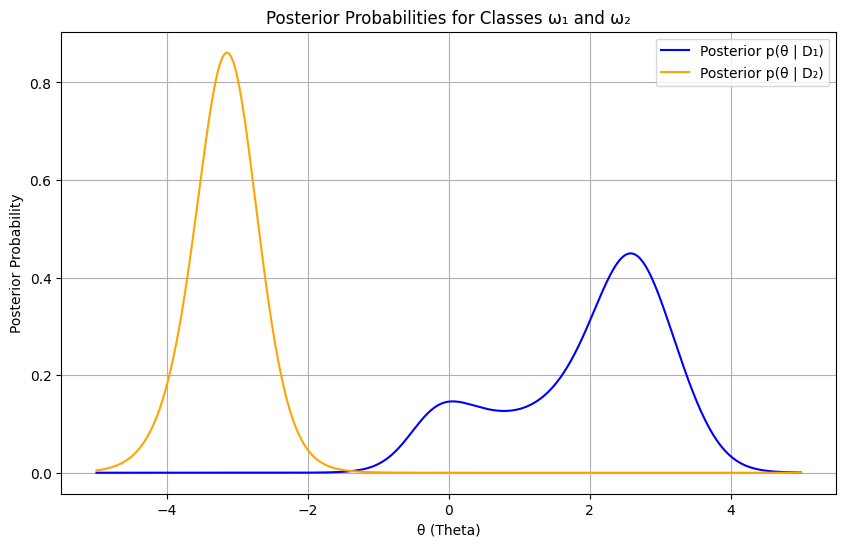

Posterior mean for θ₁: 1.9487601927526557
Posterior mean for θ₂: -3.1726011242199164


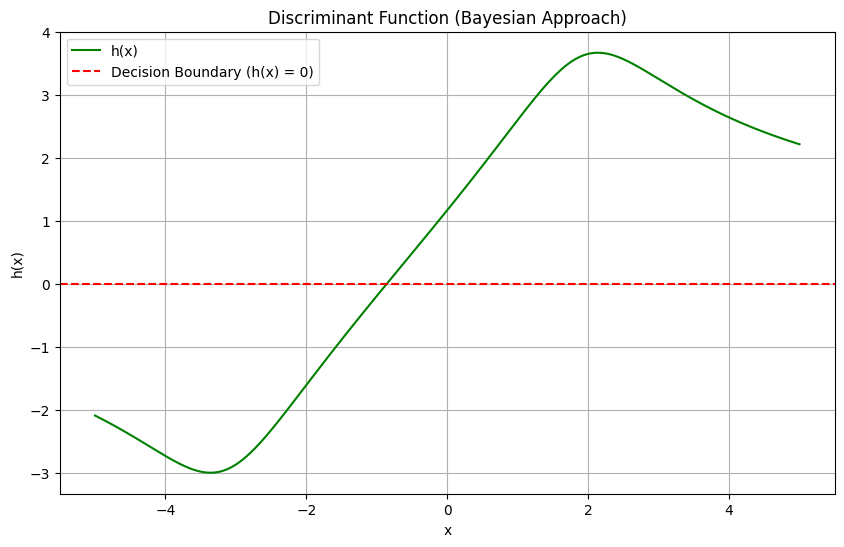

In [4]:
# B.1

# Define the prior density function
def prior(theta):
    return 1 / (10 * np.pi * (1 + (theta / 10)**2))

# Define the posterior density function
def posterior(theta, data):
    likelihood = np.prod(1 / (np.pi * (1 + (data - theta)**2)))
    return likelihood * prior(theta)

# Compute the posterior for each theta
posterior_D1 = [posterior(theta, D1) for theta in theta_candidates]
posterior_D2 = [posterior(theta, D2) for theta in theta_candidates]

# Normalize (compute the integral of posterior)
posterior_D1 /= np.trapezoid(posterior_D1, theta_candidates)
posterior_D2 /= np.trapezoid(posterior_D2, theta_candidates)

# Plot the posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(theta_candidates, posterior_D1, label="Posterior p(θ | D₁)", color="blue")
plt.plot(theta_candidates, posterior_D2, label="Posterior p(θ | D₂)", color="orange")
plt.xlabel("θ (Theta)")
plt.ylabel("Posterior Probability")
plt.title("Posterior Probabilities for Classes ω₁ and ω₂")
plt.legend()
plt.grid()
plt.show()

# B.2

# Compute posterior means for θ
mean_theta1 = np.trapezoid(theta_candidates * posterior_D1, theta_candidates)
mean_theta2 = np.trapezoid(theta_candidates * posterior_D2, theta_candidates)

print(f"Posterior mean for θ₁: {mean_theta1}")
print(f"Posterior mean for θ₂: {mean_theta2}")

# Compute discriminant function h(x)
h_x = []

for x in x_values:
    p_x_given_D1 = 1 / (np.pi * (1 + (x - mean_theta1)**2))
    p_x_given_D2 = 1 / (np.pi * (1 + (x - mean_theta2)**2))
    h = np.log(p_x_given_D1) - np.log(p_x_given_D2) + np.log(P_w1) - np.log(P_w2)
    h_x.append(h)

# Plot discriminant function h(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, h_x, label="h(x)", color="green")
plt.axhline(0, color="red", linestyle="--", label="Decision Boundary (h(x) = 0)")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.title("Discriminant Function (Bayesian Approach)")
plt.legend()
plt.grid()
plt.show()



# Μέρος Γ

## 1η Ενότητα: Ταξινομητής με Decision Tree
Εκπαιδεύω τον αλγόριθμο με το 50% των δεδομένων και ταξινομώ το υπόλοιπο 50%.


## 2η Ενότητα: Ταξινομητής με Random Forest
Εκπαιδεύω τον ταξινομητή με 100 νέα σύνολα εκπαίδευσης, ένα για κάθε δέντρο με την τεχνική  Bootstrap.

Decision Tree Accuracy: 0.71
Tree Depth: 11


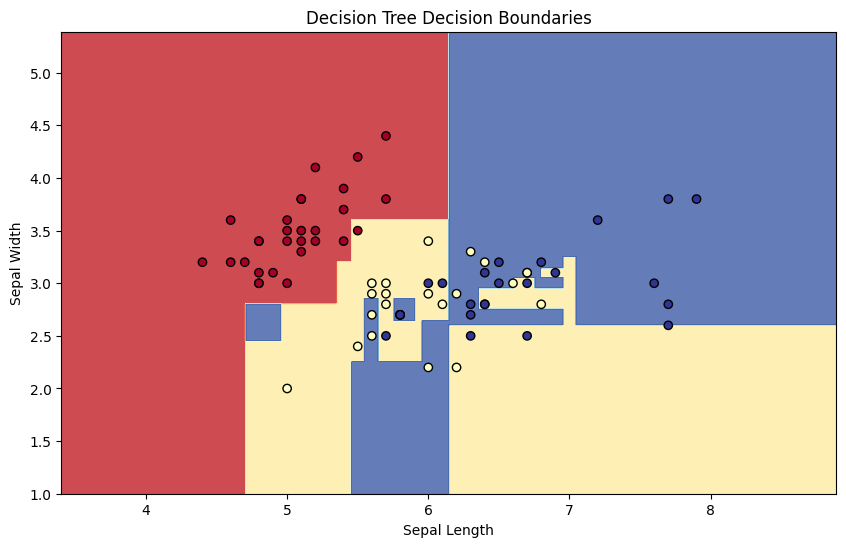

Random Forest Accuracy: 0.76
Tree Depth: 11


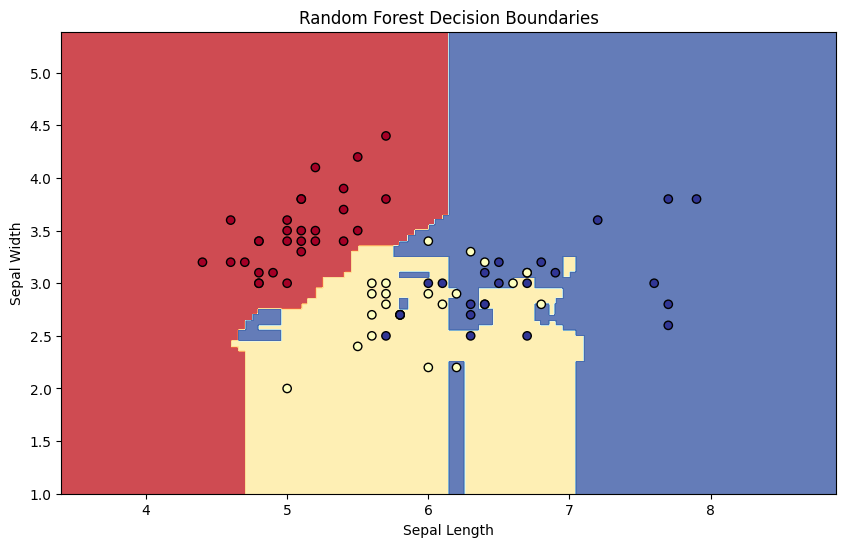

In [6]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 1st section

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only sepal length and sepal width
y = iris.target

# Split dataset into training and testing (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
depth = tree_clf.get_depth()

print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Tree Depth: {depth}")

# Visualize decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.RdYlBu)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()

# Plot decision boundaries for Decision Tree
plot_decision_boundaries(X_test, y_test, tree_clf, "Decision Tree Decision Boundaries")

# 2nd section

# Train Random Forest Classifier
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, max_samples=0.5, random_state=42)
forest_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_clf.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

print(f"Random Forest Accuracy: {accuracy_forest:.2f}")
print(f"Tree Depth: {depth}")

# Plot decision boundaries for Random Forest
plot_decision_boundaries(X_test, y_test, forest_clf, "Random Forest Decision Boundaries")